Objective

Clensing train data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf

In [2]:
#pip install numpy-financial

In [3]:
!ls

Data
Data_Clensing_Test.ipynb
Data_Clensing_Train.ipynb
Modelling.ipynb
Project Proposal.pdf
README.md
Split_Dataframe_Train_Test.ipynb


In [8]:
df = pd.read_csv('Data/Loan_Default_train.csv',index_col=0)

In [9]:
df.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1,Status
ID,,,,,,,,,,,,,,,,,,,,,
148781,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,726500,...,CRIF,625,EXP,45-54,not_inst,57.750397,North,direct,30.0,0
40828,2019,cf,Female,pre,type1,p1,l1,nopc,nob/c,266500,...,CRIF,567,CIB,25-34,to_inst,78.846154,North,direct,44.0,0
133157,2019,cf,Joint,nopre,type2,p4,l1,nopc,b/c,446500,...,EXP,692,EXP,55-64,not_inst,73.437500,North,direct,NaN,0
113792,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,296500,...,CIB,893,EXP,55-64,to_inst,64.737991,North,direct,36.0,0
86062,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,366500,...,CRIF,719,EXP,>74,to_inst,58.359873,south,direct,38.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111502 entries, 148781 to 146848
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       111502 non-null  int64  
 1   loan_limit                 108970 non-null  object 
 2   Gender                     111502 non-null  object 
 3   approv_in_adv              110836 non-null  object 
 4   loan_type                  111502 non-null  object 
 5   loan_purpose               111396 non-null  object 
 6   Credit_Worthiness          111502 non-null  object 
 7   open_credit                111502 non-null  object 
 8   business_or_commercial     111502 non-null  object 
 9   loan_amount                111502 non-null  int64  
 10  rate_of_interest           84121 non-null   float64
 11  Interest_rate_spread       83981 non-null   float64
 12  Upfront_charges            81720 non-null   float64
 13  term                    

In [11]:
df.shape

(111502, 33)

In [12]:
df = df.drop(['dtir1','year'],axis =1)

In [13]:
df.isna().sum()

loan_limit                    2532
Gender                           0
approv_in_adv                  666
loan_type                        0
loan_purpose                   106
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             27381
Interest_rate_spread         27521
Upfront_charges              29782
term                            29
Neg_ammortization               90
interest_only                    0
lump_sum_payment                 0
property_value               11377
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        6901
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            140
submission_of_application      140
LTV                          11377
Region              

Below function is developed to decide for imputation strategy repeatedly to calculate mean, meadian, mode and draw histograms for different variables.

In [14]:
def missingval(data,bins=50):

    '''
    This will print histogram with the variable statstics of mean, median and mode.
    
    Parameters :

    data - respective variable
    bins - no of bins in the histogram

    '''
    
    plt.hist(data, bins=50, edgecolor='black')
    plt.xticks()
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')
    plt.title('Histogram of Your Data')
    plt.xlim(data.min(), data.max())
    plt.show()
    
    mean = data.mean()
    median = data.median()
    mode = data.mode()
    
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Mode: {mode}')

### Missing values of LTV

LTV represent the ratio between loan amount and property value. Therefore ratio of more than 100 is unrealistic. This may occur due to neglegence at the point of granting the loan or intentionally commiting. These outliers might distort the model prediction. Therefore removing from the database.

In [15]:
df = df.drop(df[df['LTV'] > 100].index)

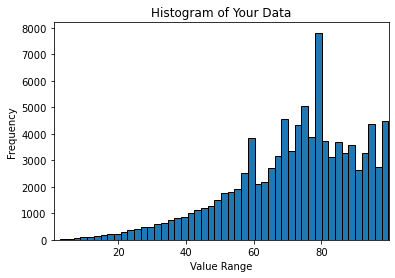

Mean: 72.04255776288768
Median: 75.06510417
Mode: 0    81.25
dtype: float64


In [16]:
missingval(df['LTV'])

As the distribution is skewed appropriate imputation for dataset would be median for LTV

In [17]:
df['LTV'].fillna(df['LTV'].median(), inplace=True)

### Approximate Missing Property Values

Property value field contains about 15,000 missing values. If remove from dataframe will be removing 10% of the database. Therfore to alleviate the issue approximate the property value using the loan amount and LTV value.

In [18]:
df['property_value'].fillna(df['loan_amount']*100 / df['LTV'], inplace=True)

### Missing Values of Rate of Interest

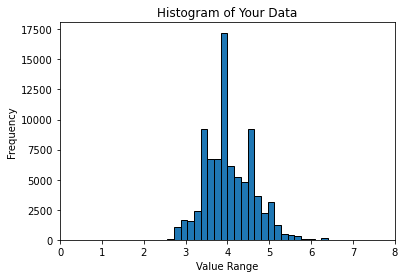

Mean: 4.04754818383988
Median: 3.99
Mode: 0    3.99
dtype: float64


In [19]:
missingval(df['rate_of_interest'])

As above distribution is bit skewed the imputation strategy is to use median

In [20]:
df['rate_of_interest'].fillna(df['rate_of_interest'].median(), inplace=True)

There is one record with 0% interest which is unrealistic. Therefore filterout particular record from the dataframe.

In [21]:
df = df[df['rate_of_interest']>0]

### Missing Values of Interest Rate Spread

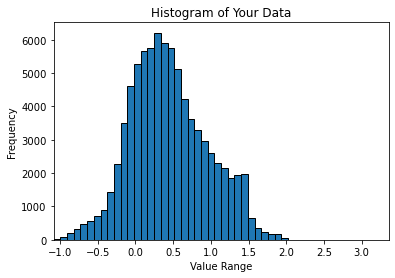

Mean: 0.443619235421632
Median: 0.3922
Mode: 0   -0.028
dtype: float64


In [22]:
missingval(df['Interest_rate_spread'])

As above distribution is some what normally distributed, it is decided to use mean as the imputation strategy for interest rate spread. In making the decision taken conservative approach where banks tend to play with spreads and missing values to include the higher of the statistics. 

In [23]:
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(), inplace=True)

### Missing Values of Upfront Charges

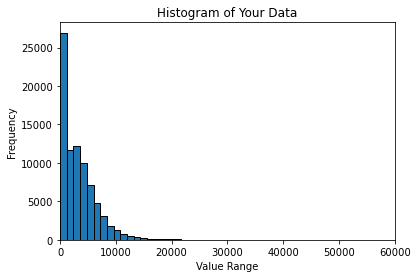

Mean: 3234.6789180440855
Median: 2603.6
Mode: 0    0.0
dtype: float64


In [24]:
missingval(df['Upfront_charges'])

Usually the upfront charge is certain % of the loan. Therefore calculating the upfront charge % column.

In [25]:
df['Upfront_charges%']=df['Upfront_charges']/df['loan_amount']

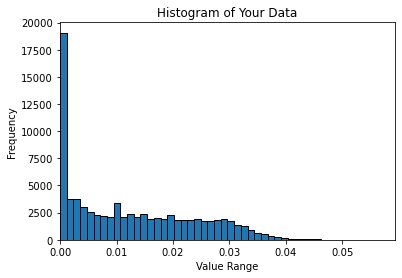

Mean: 0.012403104440308463
Median: 0.009954058192955589
Mode: 0    0.0
dtype: float64


In [26]:
missingval(df['Upfront_charges%'])

In [27]:
df['Upfront_charges%'].fillna(df['Upfront_charges%'].median(), inplace=True)

Filling Missing values in upfront charges

In [28]:
df['Upfront_charges'].fillna(df['loan_amount'] * df['Upfront_charges%'], inplace=True)

### Missing Values of Term

The term contains decimal percentage of missing values. Therefore those 41 rows to be dropped from the database.

In [29]:
df = df.dropna(subset =['term'])

### Missing Values of Monthly Income

As missing values of monthly income varies from person to person cannot be determine directly. Also there are some records have 0 income which is impossible. Therefore those rows removed from the dataframe.

In [30]:
df = df[df['income']>0]

In [31]:
df.isna().sum()

loan_limit                   2417
Gender                          0
approv_in_adv                 633
loan_type                       0
loan_purpose                   99
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization              88
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                             0
submission_of_application       0
LTV                             0
Region                          0
Security_Type 

In [32]:
df.shape

(102512, 32)

### Calculate Monthly Loan Payment

Converting rate of interest and spread to % terms

In [33]:
#df['rate_of_interest'] = df['rate_of_interest']/100
#df['Interest_rate_spread'] = df['Interest_rate_spread']/100

Calculate monthly premium based on rate of interest, term and loan amount using loan ammmortization

In [34]:
df['monthly_premium'] = npf.pmt(df['rate_of_interest']/(12*100), df['term'], df['loan_amount'])*-1

Calculate monthly premium to income ratio

In [35]:
df['PTI']=df['monthly_premium']/df['income']

Cleansing PTI column, where PMI column greater than 1 is not possible. If greater than 1 means that loan premium is greater than the income. These impossible scenarios to remove from the dataframe.

In [36]:
df = df[df['PTI']<1]

In [37]:
df.shape

(102202, 34)

In [38]:
df['PTI'].max()

0.9989983197104034

In [39]:
df.isna().sum()

loan_limit                   2409
Gender                          0
approv_in_adv                 628
loan_type                       0
loan_purpose                   99
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization              88
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                             0
submission_of_application       0
LTV                             0
Region                          0
Security_Type 

### Missing Values of Monthly Income

For loan limit imputation strategy used as most common category.

In [40]:
most_common = df['loan_limit'].mode()[0]
df['loan_limit'].fillna(most_common, inplace=True)

In [41]:
df.isna().sum()

loan_limit                     0
Gender                         0
approv_in_adv                628
loan_type                      0
loan_purpose                  99
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                           0
Neg_ammortization             88
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                            0
submission_of_application      0
LTV                            0
Region                         0
Security_Type                  0
Status    

### Missing Values of approve in advance, loan purpose and neg_ammortization

As those are much personalized information those records have removed from the database

In [42]:
df = df.dropna()

In [43]:
df.shape

(101387, 34)

In [44]:
df.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
Upfront_charges%             0
monthly_

### Composition of Target Column

In [45]:
df['Status'].value_counts()

0    76933
1    24454
Name: Status, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101387 entries, 148781 to 146848
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 101387 non-null  object 
 1   Gender                     101387 non-null  object 
 2   approv_in_adv              101387 non-null  object 
 3   loan_type                  101387 non-null  object 
 4   loan_purpose               101387 non-null  object 
 5   Credit_Worthiness          101387 non-null  object 
 6   open_credit                101387 non-null  object 
 7   business_or_commercial     101387 non-null  object 
 8   loan_amount                101387 non-null  int64  
 9   rate_of_interest           101387 non-null  float64
 10  Interest_rate_spread       101387 non-null  float64
 11  Upfront_charges            101387 non-null  float64
 12  term                       101387 non-null  float64
 13  Neg_ammortization       

After all clensing activities dataframe reduced to 135191 records with 33 features and 1 target column. This is 9% reduction of records from the original database.

Dataframe exported to a csv file.

In [47]:
df.to_csv('data/Loan_Default_train_cleaned.csv')